Import Geopandas. [Geopandas Documentation](https://geopandas.org/en/stable/docs/user_guide.html)

In [1]:
import geopandas as gpd

Load *osm-mmm-bnac* geojson file into the **df_pistes_cyclables** dataframe and display it's type.

In [2]:
data_file = "osm-mmm-bnac.geojson"
df_pistes_cyclables = gpd.read_file(data_file)
print("df_pistes_cyclables :", type(df_pistes_cyclables))

df_pistes_cyclables : <class 'geopandas.geodataframe.GeoDataFrame'>


Show a few lines of the dataframe.

In [3]:
df_pistes_cyclables.head()

,id_local,code_com_d,ame_d,code_com_g,ame_g,geometry
0,id_loc60696586,34198,PISTE CYCLABLE,34198,AUTRE,"LINESTRING (3.96894 43.55119, 3.96894 43.55121..."
1,id_loc426204917,34198,AMENAGEMENT MIXTE PIETON VELO HORS VOIE VERTE,34198,AUCUN,"LINESTRING (3.96878 43.55121, 3.96877 43.55120..."
2,id_loc424082558,34198,AMENAGEMENT MIXTE PIETON VELO HORS VOIE VERTE,34198,AUCUN,"LINESTRING (3.96565 43.55310, 3.96562 43.55295)"
3,id_loc426204908,34198,AMENAGEMENT MIXTE PIETON VELO HORS VOIE VERTE,34198,AUCUN,"LINESTRING (3.96562 43.55295, 3.96562 43.55293)"
4,id_loc424082555,34198,AMENAGEMENT MIXTE PIETON VELO HORS VOIE VERTE,34198,AUCUN,"LINESTRING (3.96636 43.55303, 3.96629 43.55280)"


Plot the dataframe.

<Axes: >

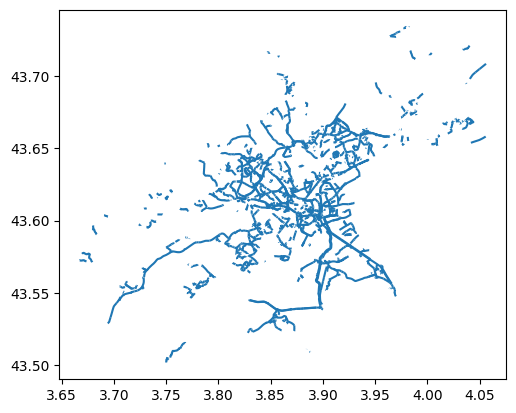

In [4]:
df_pistes_cyclables.plot()

LINESTRING (3.9689408001 43.5511921002, 3.9689414003 43.5512133005, 3.9689387996 43.5514249002, 3.9689024003 43.5516418009, 3.9688587 43.5517632007, 3.9688147 43.5518318001, 3.9687669005 43.5518811003, 3.9687411995 43.551903301, 3.9687025002 43.5519267001, 3.9686554999 43.5519488002, 3.9686381996 43.5519623004, 3.9686260005 43.5519792005)
Minimum Longitude (min_x): 3.6671366005
Minimum Latitude (min_y): 43.5016764006
Maximum Longitude (max_x): 4.0561184994
Maximum Latitude (max_y): 43.7344309003


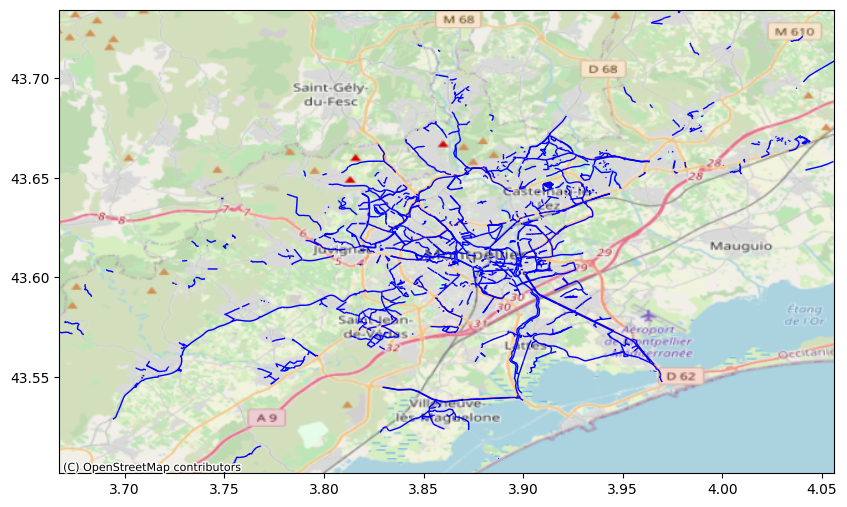

In [6]:
import matplotlib.pyplot as plt
import contextily as ctx

data_file = "osm-mmm-bnac.geojson"

fig, ax = plt.subplots(figsize=(10, 10))

df_pistes_cyclables.plot(ax=ax, linewidth=1, color='blue')

ctx.add_basemap(ax, crs=df_pistes_cyclables.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

for line in df_pistes_cyclables["geometry"]:
    print(line)
    break

bounds = df_pistes_cyclables.geometry.bounds

zoom = 0.00
min_x = bounds.minx.min() - zoom
min_y = bounds.miny.min() - zoom
max_x = bounds.maxx.max() + zoom
max_y = bounds.maxy.max() + zoom

# Affichage des résultats
print("Minimum Longitude (min_x):", min_x)
print("Minimum Latitude (min_y):", min_y)
print("Maximum Longitude (max_x):", max_x)
print("Maximum Latitude (max_y):", max_y)

ax.set_xlim([min_x, max_x])
ax.set_ylim([min_y, max_y])

plt.show()


## Show on a map:

In [7]:
pip install folium --break-system-packages

Note: you may need to restart the kernel to use updated packages.


In [8]:
import folium

center = df_pistes_cyclables.geometry.unary_union.centroid

map = folium.Map(location=[center.y, center.x], zoom_start=13)

folium.GeoJson(df_pistes_cyclables, name='Pistes Cyclables').add_to(map)

folium.LayerControl().add_to(map)

map

In [9]:
data_file_trafic = "MMM_MMM_Comptage.geojson"
df_trafic = gpd.read_file(data_file_trafic)

DriverError: MMM_MMM_Comptage.geojson: No such file or directory

In [10]:
center = df_trafic.geometry.unary_union.centroid

map_trafic = folium.Map(location=[center.y, center.x], zoom_start=13)

style1 = {'fillColor': '#FF0000', 'color': '#FF0000'}

folium.GeoJson(df_pistes_cyclables, name='Pistes Cyclables').add_to(map_trafic)
folium.GeoJson(df_trafic, name='Pistes Cyclables', style_function=lambda x:style1).add_to(map_trafic)

folium.LayerControl().add_to(map_trafic)

map_trafic

NameError: name 'df_trafic' is not defined

In [62]:
import pandas as pd
import geopandas as gpd

def extract_time_info(time_str):
    if pd.isna(time_str):
        return None, None, None
    parts = time_str.split(' ')
    count = int(parts[0])
    # join parts[1:]
    start_time = parts[1].replace('(', '').replace('h', ':')
    end_time = parts[3].replace(')', '').replace('h', ':')
    return start_time, end_time, count

# Appliquer la fonction sur les colonnes matin et soir
df_trafic[['start_matin', 'end_matin', 'count_matin']] = df_trafic['hp_johvs_matin'].apply(lambda x: pd.Series(extract_time_info(x)))
df_trafic[['start_soir', 'end_soir', 'count_soir']] = df_trafic['hp_johvs_soir'].apply(lambda x: pd.Series(extract_time_info(x)))

# Afficher les résultats pour vérification
print(df_trafic[['start_matin', 'end_matin', 'count_matin', 'start_soir', 'end_soir', 'count_soir', 'geometry']].head())


  start_matin end_matin  count_matin start_soir end_soir  count_soir  \
0        None      None          NaN       None     None         NaN   
1       11:45     12:45        115.0      17:15    18:15       392.0   
2        7:45      8:45        117.0      13:30    14:30        58.0   
3        8:00      9:00         61.0      17:00    18:00        44.0   
4        None      None          NaN       None     None         NaN   

                                            geometry  
0  LINESTRING (3.85738 43.54372, 3.85759 43.54363...  
1  LINESTRING (3.85738 43.54372, 3.85759 43.54363...  
2  LINESTRING (3.85738 43.54372, 3.85759 43.54363...  
3  LINESTRING (3.88667 43.60340, 3.88503 43.60329...  
4  LINESTRING (3.76135 43.64393, 3.75772 43.64319...  


In [12]:
import folium
import ipywidgets as widgets
from IPython.display import display, clear_output

# Fonction pour créer la carte basée sur une heure donnée
def create_map(selected_hour):
    map_trafic = folium.Map(location=[center.y, center.x], zoom_start=13)
    for idx, row in df_trafic.iterrows():
        if row['start_matin'] is None or row['end_matin'] is None or row['start_soir'] is None or row['end_soir'] is None:
            continue
        if selected_hour >= int(row['start_matin'].split(':')[0]) and selected_hour <= int(row['end_matin'].split(':')[0]) or selected_hour >= int(row['start_soir'].split(':')[0]) and selected_hour <= int(row['end_soir'].split(':')[0]):
            sim_color = 'red'  # Utilisez une fonction pour changer la couleur si nécessaire
            folium.GeoJson(
                row.geometry,
                style_function=lambda x, color=sim_color: {
                    'fillColor': color,
                    'color': color
                }
            ).add_to(map_trafic)
    return map_trafic

# Widget pour sélectionner l'heure
hour_selector = widgets.IntSlider(
    min=0,
    max=24,
    step=1,
    value='7',
    description='Select Hour:',
    disabled=False,
)

# Fonction pour gérer le changement de valeur du widget
def on_hour_change(change):
    clear_output(wait=True)
    display(hour_selector)
    selected_hour = change['new']
    display(create_map(selected_hour))

hour_selector.observe(on_hour_change, names='value')

display(hour_selector)
display(create_map(7))


IntSlider(value=7, description='Select Hour:', max=24)

NameError: name 'df_trafic' is not defined

In [3]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash_leaflet as dl
import geopandas as gpd
from shapely.geometry import mapping
import json


# Convertir les géométries en GeoJSON
def geometry_to_geojson(geometry):
    return mapping(geometry)

# Créer une liste de couches GeoJSON pour les différentes heures
layers = {}
for hour in range(24):
    features = []
    for idx, row in df_trafic.iterrows():
        if row['start_matin'] is None or row['end_matin'] is None or row['start_soir'] is None or row['end_soir'] is None:
            continue
        start_matin_hour = int(row['start_matin'].split(':')[0])
        end_matin_hour = int(row['end_matin'].split(':')[0])
        start_soir_hour = int(row['start_soir'].split(':')[0])
        end_soir_hour = int(row['end_soir'].split(':')[0])
        if (hour >= start_matin_hour and hour <= end_matin_hour) or (hour >= start_soir_hour and hour <= end_soir_hour):
            feature = {
                'type': 'Feature',
                'geometry': geometry_to_geojson(row.geometry),
                'properties': {'color': 'red'}
            }
            features.append(feature)
    layers[hour] = features

# Initialiser l'application Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Slider(
        id='hour-slider',
        min=0,
        max=23,
        step=1,
        value=7,
        marks={i: f'{i}:00' for i in range(24)},
        tooltip={"placement": "bottom", "always_visible": True}
    ),
    dl.Map(center=[43.6, 3.8], zoom=13, id="map", children=[
        dl.TileLayer(),
        dl.GeoJSON(id="geojson", style={'color': 'red'}),
        # add a GeoJSON to the map for df_pistes_cyclables
        dl.GeoJSON(data=df_pistes_cyclables.__geo_interface__,  id="pistes_cyclables")
    ], style={'width': '100%', 'height': '80vh'}),
])

# ajoute une couche GeoJSON à la carte pour avoir tout les route de df_pistes_cyclables


@app.callback(
    Output('geojson', 'data'),
    [Input('hour-slider', 'value')]
)
def update_map(selected_hour):
    return {
        'type': 'FeatureCollection',
        'features': layers[selected_hour]
    }

if __name__ == '__main__':
    app.run_server(debug=True)


NameError: name 'df_trafic' is not defined

In [1]:
import requests
# URL avec date début et date fin variables
url_base = 'https://portail-api-data.montpellier3m.fr/bikestation_timeseries/urn%3Angsi-ld%3Astation%3A001/attrs/availableBikeNumber?fromDate={}&toDate={}'
date_debut = '2024-04-01T00:00:00'
date_fin = '2024-04-02T23:00:00'
# Remplacer {} par la date correspondante
url = url_base.format(date_debut, date_fin)
r = requests.get(url)
r.json()

{'attrName': 'availableBikeNumber',
 'entityId': 'urn:ngsi-ld:station:001',
 'entityType': 'BikeHireDockingStation',
 'index': ['2024-04-01T00:00:06.000+00:00',
  '2024-04-01T00:01:05.000+00:00',
  '2024-04-01T00:02:06.000+00:00',
  '2024-04-01T00:03:06.000+00:00',
  '2024-04-01T00:04:05.000+00:00',
  '2024-04-01T00:05:07.000+00:00',
  '2024-04-01T00:06:05.000+00:00',
  '2024-04-01T00:07:05.000+00:00',
  '2024-04-01T00:08:05.000+00:00',
  '2024-04-01T00:09:05.000+00:00',
  '2024-04-01T00:10:05.000+00:00',
  '2024-04-01T00:11:05.000+00:00',
  '2024-04-01T00:12:05.000+00:00',
  '2024-04-01T00:13:05.000+00:00',
  '2024-04-01T00:14:05.000+00:00',
  '2024-04-01T00:15:05.000+00:00',
  '2024-04-01T00:16:05.000+00:00',
  '2024-04-01T00:17:05.000+00:00',
  '2024-04-01T00:18:05.000+00:00',
  '2024-04-01T00:19:06.000+00:00',
  '2024-04-01T00:20:06.000+00:00',
  '2024-04-01T00:21:06.000+00:00',
  '2024-04-01T00:22:05.000+00:00',
  '2024-04-01T00:23:06.000+00:00',
  '2024-04-01T00:24:04.000+00:00',

In [5]:
df = pd.DataFrame(r.json())
df = df.iloc[::30] # Sélectionner 1 ligne sur 30 car inutile d'avoir les données pour chaque minute
df['index'] = pd.to_datetime(df['index']) # Convertir dates en datetime
df.set_index('index', inplace=True) # Les dates deviennent l'index du dataframe
print(df)

                                      attrName                 entityId  \
index                                                                     
2024-04-01 00:00:06+00:00  availableBikeNumber  urn:ngsi-ld:station:001   
2024-04-01 00:30:05+00:00  availableBikeNumber  urn:ngsi-ld:station:001   
2024-04-01 01:00:06+00:00  availableBikeNumber  urn:ngsi-ld:station:001   
2024-04-01 01:30:06+00:00  availableBikeNumber  urn:ngsi-ld:station:001   
2024-04-01 02:00:06+00:00  availableBikeNumber  urn:ngsi-ld:station:001   
...                                        ...                      ...   
2024-04-02 20:30:05+00:00  availableBikeNumber  urn:ngsi-ld:station:001   
2024-04-02 21:00:06+00:00  availableBikeNumber  urn:ngsi-ld:station:001   
2024-04-02 21:30:05+00:00  availableBikeNumber  urn:ngsi-ld:station:001   
2024-04-02 22:00:06+00:00  availableBikeNumber  urn:ngsi-ld:station:001   
2024-04-02 22:30:06+00:00  availableBikeNumber  urn:ngsi-ld:station:001   

                        

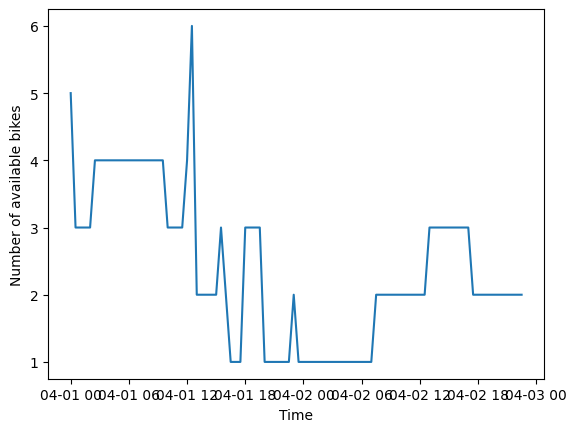

In [6]:
#moyenne = np.mean(df['values'])
#print(moyenne)

plt.xlabel('Time')
plt.ylabel('Number of available bikes')
plt.plot(df.index, df['values'])